Final Project by Siyu Xu Link to access the blog: https://siyuxu-43687.medium.com/league-of-legends-machine-learning-models-74388859fa52

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score)
from sklearn import tree


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
data = pd.read_csv('/content/high_diamond_ranked_10min.csv')
data

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [ ]:
# DATA PREPROCESSING

#Check for missing values
print(data.isnull().any())
print('\nThere is no missing value.\n')

#Check for duplicated data
print(data.duplicated(subset=None).any())
print('\nThere is no duplicated value.\n')

#Drop unnecessary columns:
# gameId is unnecessary for prediction; 
# deleted repeated columns e.g. redkills = bluedeaths;
# AvgLevel/GoldpPerMin/CSPerMin is colinear to TotalExperience/TotalGold/TotalMinionsKilled, we can just keep one; 
# EliteMonsters = dragons + heralds;
droppedData = data.drop(['gameId', 'redKills','redDeaths', 'redAssists', 'redFirstBlood','redCSPerMin',
                         'redGoldPerMin','redGoldDiff',	'redExperienceDiff','blueAvgLevel',	'redAvgLevel',
                         'blueEliteMonsters','redEliteMonsters','redDragons',	'redHeralds',	'blueGoldPerMin',
                         'redTotalMinionsKilled', 'blueTotalMinionsKilled'],axis = 1, inplace = False)

#Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(droppedData)
cols = ['blueWins',	'blueWardsPlaced',	'blueWardsDestroyed',	'blueFirstBlood','blueKills',	'blueDeaths',	
        'blueAssists',	'blueDragons','blueHeralds','blueTowersDestroyed',
        'blueTotalJungleMinionsKilled',	'blueGoldDiff',	'blueExperienceDiff',
        'blueCSPerMin',		'redWardsPlaced',	'redWardsDestroyed',
        	'redTowersDestroyed',	
         'redTotalJungleMinionsKilled','blueTotalGold','blueTotalExperience','redTotalGold','redTotalExperience']
normalizedData = pd.DataFrame(normalizedData, columns=cols)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)
print(normalizedData.head())

# Feature Selection: Chi-Squared (further drop features)
X1 = normalizedData.iloc[:, 1:22]
y1 = normalizedData.iloc[:, 0]
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(chi2, k=15)
fit = test.fit(X1, y1)
np.set_printoptions(precision=3,suppress=True)
pd.set_option('display.max_rows', None)
scores = pd.DataFrame(zip(X1.columns, fit.scores_))
scores.columns = ['Feature', 'Scores']
print(scores.sort_values(by=['Scores'],ascending=False))

finalData = normalizedData.drop(['blueWardsPlaced','redTowersDestroyed','blueWardsDestroyed','redTotalJungleMinionsKilled',
                                 'redTotalExperience','blueExperienceDiff','redWardsDestroyed'],axis = 1, inplace = False)
pd.set_option('display.max_rows', 5)
print(finalData)

gameId                         False
blueWins                       False
blueWardsPlaced                False
blueWardsDestroyed             False
blueFirstBlood                 False
                               ...  
redTotalJungleMinionsKilled    False
redGoldDiff                    False
redExperienceDiff              False
redCSPerMin                    False
redGoldPerMin                  False
Length: 40, dtype: bool

There is no missing value.

False

There is no duplicated value.

   blueWins  blueWardsPlaced  ...  redTotalGold  redTotalExperience
0       0.0         0.093878  ...      0.557608            0.579545
1       0.0         0.028571  ...      0.590732            0.545455
2       0.0         0.040816  ...      0.575144            0.272727
3       0.0         0.155102  ...      0.635039            0.488636
4       0.0         0.285714  ...      0.664859            0.715909

[5 rows x 22 columns]
                         Feature      Scores
6                    blueD

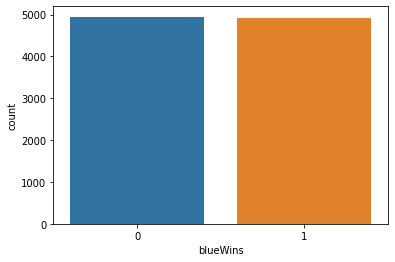

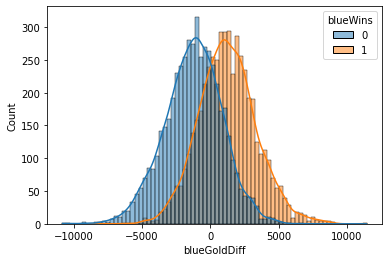

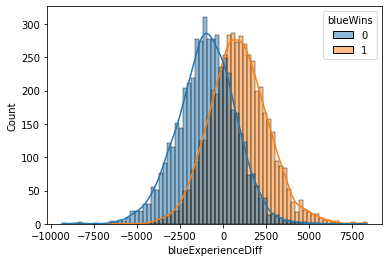

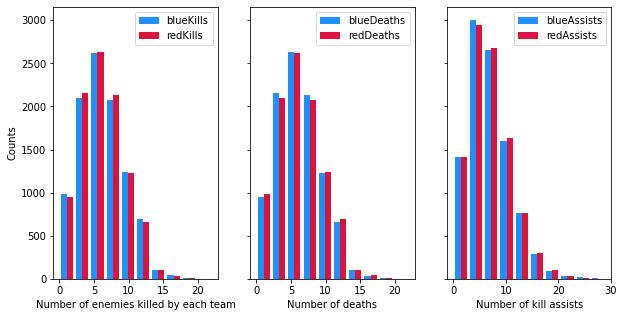

Blue team kills: 61091
Red team kills: 60634
Blue team deaths: 60634
Red team deaths: 61091
Blue team assists: 65647
Red team assists: 65815


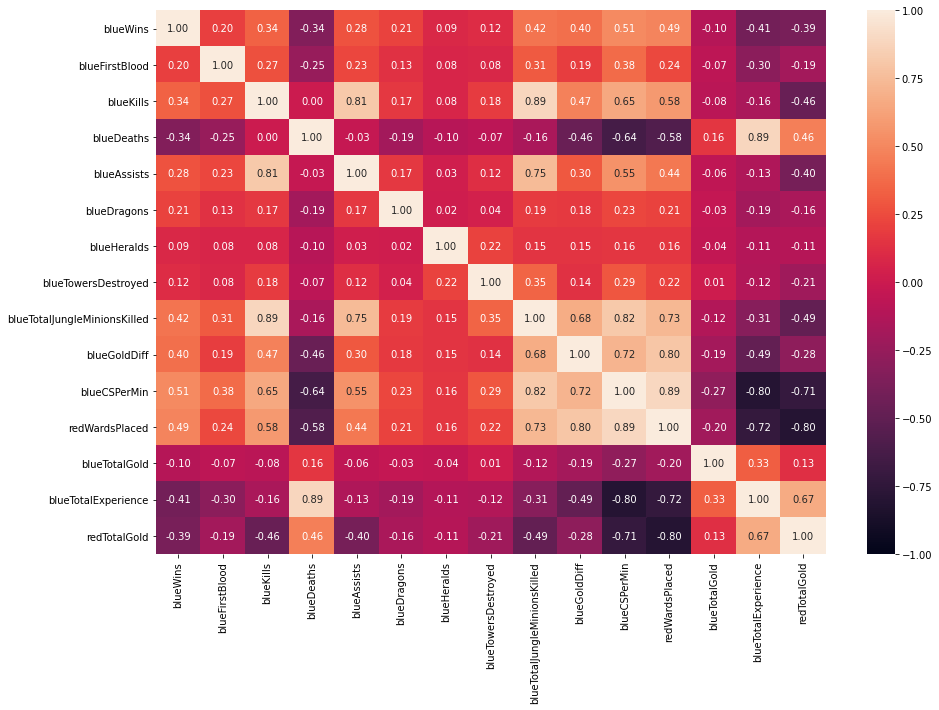

In [ ]:
# DATA VISUALIZATION

# Get the distribution of the target variable: blueWins (1 stands for the blue team has won)
sb.countplot(x='blueWins', data=droppedData) 
plt.show()

sb.histplot(x='blueGoldDiff', data=droppedData, hue='blueWins', kde=True)
plt.show()

sb.histplot(x='blueExperienceDiff', data=droppedData, hue='blueWins',kde=True)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(10, 5),sharey=True) # use original data instead of cleanned data
axes[0].set(ylabel="Counts")
axes[0].set(xlabel="Number of enemies killed by each team")
axes[1].set(xlabel="Number of deaths")
axes[2].set(xlabel="Number of kill assists")
axes[0].hist([(data['blueKills']),(data['redKills'])], bins=10, color=['dodgerblue','crimson'],label=['blueKills','redKills'])
axes[0].legend()
axes[1].hist([(data['blueDeaths']),(data['redDeaths'])], bins=10, color=['dodgerblue','crimson'],label=['blueDeaths','redDeaths'])
axes[1].legend()
axes[2].hist([(data['blueAssists']),(data['redAssists'])], bins=10, color=['dodgerblue','crimson'],label=['blueAssists','redAssists'])
axes[2].legend()
plt.show()

print("Blue team kills:", data['blueKills'].sum())
print("Red team kills:", data['redKills'].sum())
print("Blue team deaths:", data['blueDeaths'].sum())
print("Red team deaths:", data['redDeaths'].sum())
print("Blue team assists:", data['blueAssists'].sum())
print("Red team assists:", data['redAssists'].sum())

#correlation matrix
corr = finalData.corr()
plt.figure(figsize=(15,10))
sb.heatmap(corr,vmin=-1, vmax=1, annot=True, fmt='0.2f')
plt.show()

In [ ]:
#Split Data
X = finalData.iloc[:, 1:15]
y = finalData.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Baseline Accuracy
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.5010121457489879


Accuracy for logistic regression = 0.7240215924426451



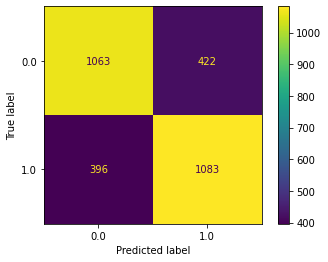

Classification Report:

              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72      1485
         1.0       0.72      0.73      0.73      1479

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



In [ ]:
# LOGISTIC REGREESION
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Accuracy for logistic regression =', metrics.accuracy_score(y_test, y_pred))
print()
metrics.plot_confusion_matrix(logReg, X_test, y_test, values_format = '.0f')
plt.show()
print('Classification Report:\n')
print(metrics.classification_report(y_test, y_pred))

Accuracy for decision tree model =  0.7162618083670715


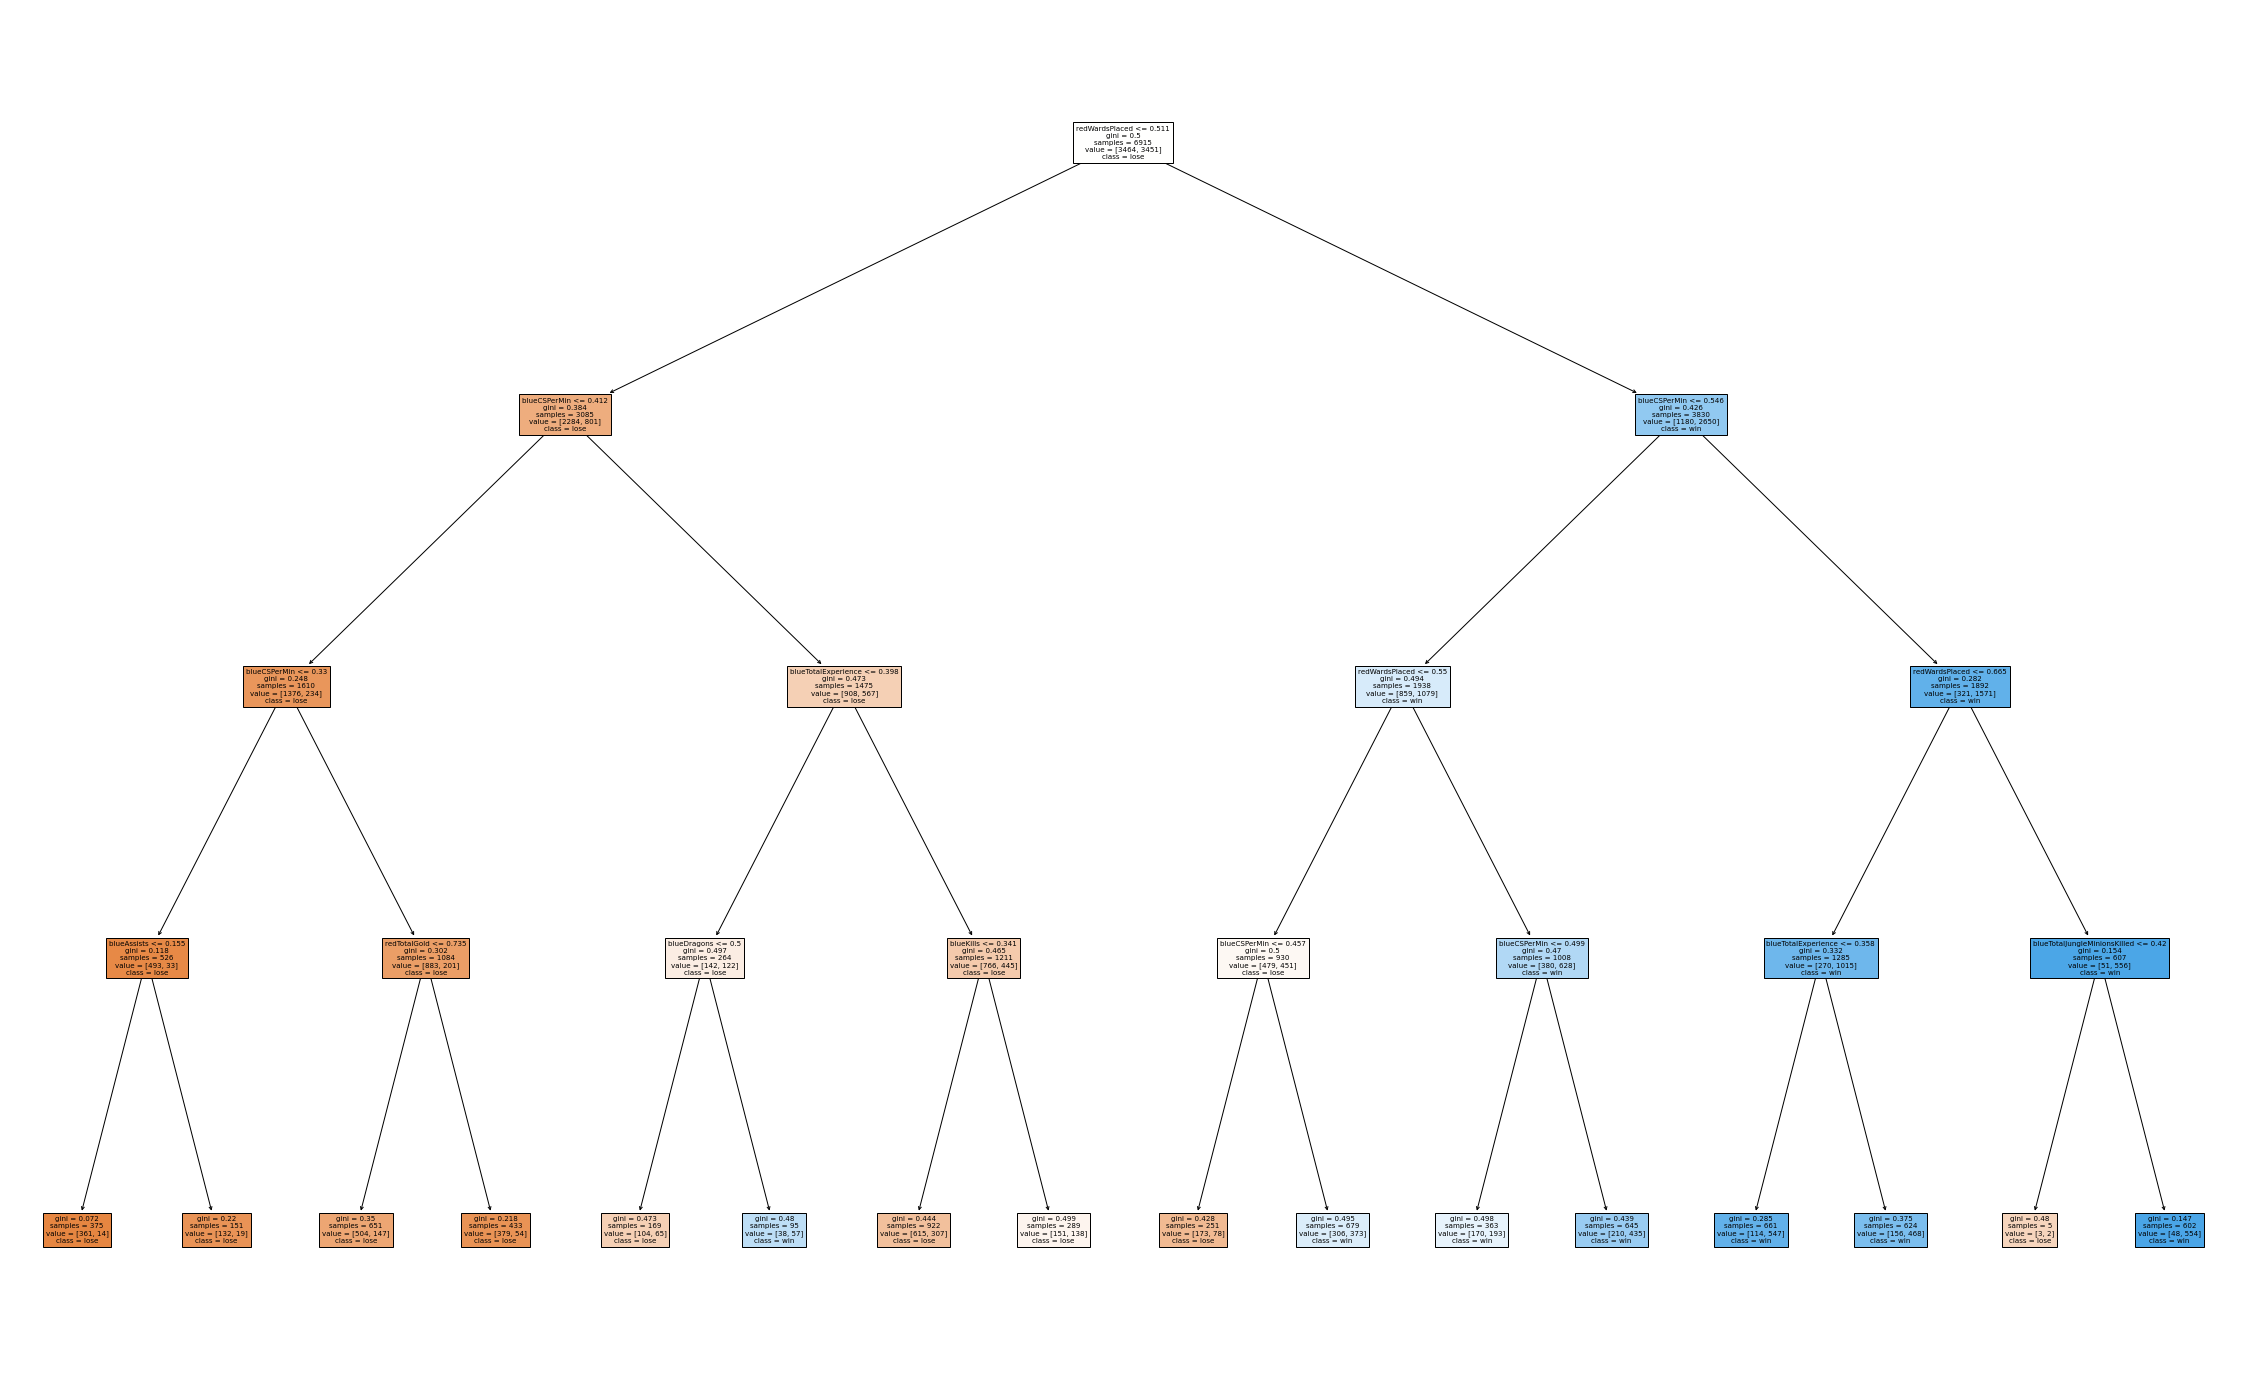

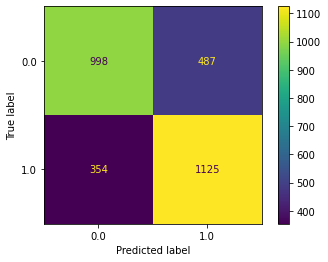

Classification Report:

              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      1485
         1.0       0.70      0.76      0.73      1479

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



In [ ]:
# DECISION TREE
model_dt = DecisionTreeClassifier(max_depth=4, max_features=5, random_state=42)
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)
print('Accuracy for decision tree model = ', acc_dt)

# Plot decision tree
plt.figure(figsize=(40,25))
fn = X.columns
cn = ['lose','win']
LOLTree = tree.plot_tree(model_dt, feature_names=fn, class_names=cn, filled=True)
plt.savefig('LOLDecisionTree.png')
plt.show()

print()
metrics.plot_confusion_matrix(model_dt, X_test, y_test, values_format = '.0f')
plt.show()
print('Classification Report:\n')
print(classification_report(y_test, pred_dt))

Accuracy for random forest forecasting model =  0.7223346828609987



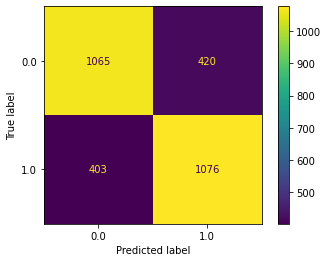

Classification Report:

              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72      1485
         1.0       0.72      0.73      0.72      1479

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964

                         Feature  Importance
9                   blueCSPerMin    0.481735
10                redWardsPlaced    0.216093
7   blueTotalJungleMinionsKilled    0.102460
12           blueTotalExperience    0.074583
13                  redTotalGold    0.042571


In [ ]:
# Random Forest Forecasting
model_rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=5, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, predict_rf)
print('Accuracy for random forest forecasting model = ', acc_rf)
print()
metrics.plot_confusion_matrix(model_rf, X_test, y_test, values_format = '.0f')
plt.show()
print('Classification Report:\n')
print(classification_report(y_test, predict_rf))

# top 5 features
importance = pd.DataFrame(zip(X_train.columns, model_rf.feature_importances_))
importance.columns=['Feature','Importance']
importance_sorted = importance.sort_values(by=['Importance'], ascending = False)
top5 = importance_sorted.iloc[0:5,:]
print(top5)

Accuracy for bagging model =  0.7044534412955465



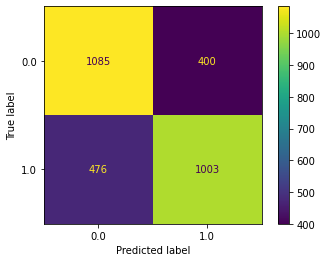

Classification Report:

              precision    recall  f1-score   support

         0.0       0.70      0.73      0.71      1485
         1.0       0.71      0.68      0.70      1479

    accuracy                           0.70      2964
   macro avg       0.70      0.70      0.70      2964
weighted avg       0.70      0.70      0.70      2964



In [ ]:
# BAGGING
model_bagging = BaggingClassifier(random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)
print('Accuracy for bagging model = ', acc_bagging)
print()
metrics.plot_confusion_matrix(model_bagging, X_test, y_test, values_format = '.0f')
plt.show()
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

Accuracy for AdaBoosting model = 0.7169365721997301



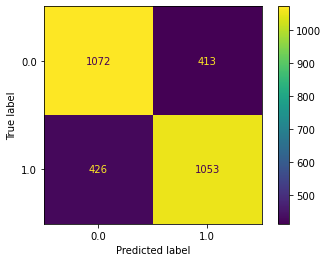

Classification Report:

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      1485
         1.0       0.72      0.71      0.72      1479

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964

                Feature  Importance
9          blueCSPerMin    0.258010
10       redWardsPlaced    0.195120
8          blueGoldDiff    0.117448
13         redTotalGold    0.113859
12  blueTotalExperience    0.110041


In [ ]:
# ADA BOOSTING
base_est = DecisionTreeClassifier (max_depth =4)
ada_boost = AdaBoostClassifier(base_est, n_estimators=100, random_state=42, learning_rate=0.05)
ada_boost.fit(X_train, y_train)
predict_ada = ada_boost.predict(X_test)
acc_ada = accuracy_score(y_test, predict_ada)
print('Accuracy for AdaBoosting model =',acc_ada)
print()
metrics.plot_confusion_matrix(ada_boost, X_test, y_test, values_format = '.0f')
plt.show()
print('Classification Report:\n')
print(classification_report(y_test, predict_ada))

# top 5 features 
imp_ada = pd.DataFrame(zip(X_train.columns, ada_boost.feature_importances_))
imp_ada.columns=['Feature','Importance']
imp_ada_sorted = imp_ada.sort_values(by=['Importance'], ascending = False)
top5_ada = imp_ada_sorted.iloc[0:5,:]
print(top5_ada)

In [ ]:
# VOTING CLASSIFIER (random forest, adaboost, log regression)
model_vt = VotingClassifier(estimators = [('rf',model_rf),('adaboost',ada_boost),('log', logReg)], voting='soft')
model_vt.fit(X_train, y_train)
vt_pred = model_vt.predict(X_test)
print('Accuracy score for voting classifier =', accuracy_score(y_test, vt_pred))

Accuracy score for voting classifier = 0.7213225371120108


Accuracy score for XGBoost = 0.72165991902834


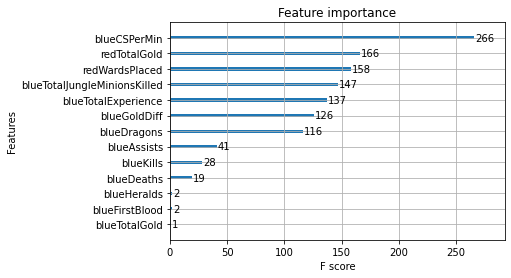

In [ ]:
# XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=X,label=y)
model_xg = xgb.XGBClassifier(max_depth = 4, learning_rate = 0.05, n_estimators = 100)
model_xg.fit(X_train,y_train)

xg_pred = model_xg.predict(X_test)
print('Accuracy score for XGBoost =', accuracy_score(y_test, xg_pred))

# Feature importance
xgb.plot_importance(model_xg)
plt.rcParams['figure.figsize'] = [5, 5]


In [7]:
# Model Comparison
print("Accuracy Score for Each Model:\n")
print("Baseline Accuracy: 0.5010121457489879\n")
print("Logistic Regression: 0.7240215924426451\n")
print("Random Forest Forecasting: 0.7223346828609987\n")
print("Voting Classifier: 0.7213225371120108\n")
print("XGBoost: 0.72165991902834\n")
print("Decision Tree: 0.7162618083670715\n")
print("AdaBoost: 0.7169365721997301\n")
print("Bagging: 0.7044534412955465\n")
print("Among all of the models, the logistic regression model performs the best, with an accuracy level of 0.724.")

Accuracy Score for Each Model:

Baseline Accuracy: 0.5010121457489879

Logistic Regression: 0.7240215924426451

Random Forest Forecasting: 0.7223346828609987

Voting Classifier: 0.7213225371120108

XGBoost: 0.72165991902834

Decision Tree: 0.7162618083670715

AdaBoost: 0.7169365721997301

Bagging: 0.7044534412955465

Among all of the models, the logistic regression model performs the best, with an accuracy level of 0.724.
